# Quantum Chemistry Tutorial 2 - Short Survey

1. **S. G. Nana Engo**, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
2. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
       
April 2024

L'objectif de ce notebook est de fournir une brève revue des principales méthodes de la chimie quantique et d'évaluer les performances. Plus spécifiquement, à la fin de ce tutoriel, l'apprenant doit être capable, 
* à travers le framework `PySCF`,
    * d'utiliser les représentations `SMILES`avec la bibliothèque `RDKiT` ou `XYZ` d'une molécule;
    * visualiser cette structure moléculaire dans un notebook avec la bibliothèque `py3Dmol`;
    * d'effectuer des calculs *ab-initio* (HF et post-HF) et DFT et établir une échelle précision/temps entre eux;
    * définir un espace actif autour du HOMO-LUMO;
* effectuer des calculs avec `xTB` et extraires les propriétés souhaitées.

## Différentes représentations d'une molécule

La figure ci-dessous présente les différentes représentations d'une molécule. 

![Mol representation](./Graphics/Mol_representation.png)

Dans ce qui suit, nous allons utiliser 

* **XYZ** est une représentation des coordonnées cartésiennes tridimensionnelles des atomes dans une molécule. Dans un fichier XYZ, chaque ligne représente un atome et contient les informations sur l'élément chimique de l'atome ainsi que ses coordonnées x, y et z;

* **SMILES**, Simplified Molecular Input Line Entry System, qui est une notation linéaire utilisée pour décrire la structure chimique des molécules de manière textuelle. Il s'agit d'une chaîne de caractères qui représente les atomes, les liaisons et les groupes fonctionnels d'une molécule. Les SMILES sont compacts et faciles à lire et à écrire. Par exemple, la molécule d'eau (H2O) peut être représentée en SMILES par "O", où "O" représente l'atome d'oxygène et les atomes d'hydrogène sont implicites.

Comme PySCF n'utilise pas directement la représentation SMILES, nous allons utiliser RDKit, la très populaire bibliothèque de chimie informatique.

In [1]:
from pathlib import Path # For filesystem paths

### Changer la representation d'une molécule avec RDKit

![RDKit](Graphics/RDKit.png)

* Importer les modules nécessaires de RDKit

In [2]:
try:
    import rdkit
except:
    !mamba install rdkit
    import rdkit
rdkit.__version__    

'2023.09.6'

In [3]:
# Define SMILES string and the corresponding name or key
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
smi_key = "Caffeine"

* Créer ou indiquer le repertoire où seront stocker les divers résultats. Pour des raisons de bonnes pratiques, nous allons créer un sous-repertoire avec le `smi_key`.

In [4]:
# Verify if the "{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)

* Générer la conformation 3D avec RDKit

In [5]:
from rdkit import Chem # A module for molecules and stuff
from rdkit.Chem import AllChem #Import all RDKit chemistry modules

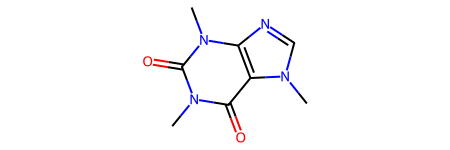

In [6]:
# Defines a molecule from its SMILES string
mol_rdkit = Chem.MolFromSmiles(smiles)

# 2D representation
mol_rdkit

In [7]:
# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)

# Optimizes the 3D conformation of the molecule
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")

0

#### Visualiser la conformation avec `py3Dmol`

In [8]:
try:
    import py3Dmol
except:
    !pip install py3Dmol
    import py3Dmol
py3Dmol.__version__

'2.1.0'

In [9]:
from rdkit.Chem.Draw import IPythonConsole

In [10]:
IPythonConsole.drawMol3D(mol_rdkit,size=(300,300))


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* Nous pouvons visualiser la conformation de la molécule avec py3Dmol directement, sans utiliser `IPythonConsole.drawMol3D` de RDKit.

In [11]:
def view3D(mol, label, position = None, size=None, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """
        if size is None:
            view = py3Dmol.view(width=300, height=300)
        else:
             view = py3Dmol.view(width=size[0], height=size[1])

        if fmt=='mol':
            view.addModel(Chem.MolToMolBlock(mol), fmt)
            # view.addModel(mol, fmt)
        elif fmt=='xyz':
            view.addModel(mol, fmt)

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})
        if position is None:
            view.addLabel(label, {'position': {'x': -2, 'y': -4, 'z': 0}})
        else:
            view.addLabel(label, {'position': {'x': position[0], 'y': position[1], 'z': position[2]}})

        view.zoomTo()
        view.show()

In [12]:
view3D(mol_rdkit, f'{smi_key} RDKit Molecule MMFF94', position=(-4,-4,0), size=(400,300))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Convertir l'objet RDKit molecule au XYZ format 

In [13]:
# Convert RDKit molecule to XYZ format 
mol_xyz = Chem.MolToXYZBlock(mol_rdkit)

# Writing optimized mol_xyz to a file
path_rdkit_xyz = working_dir / f'{smi_key}_rdkit.xyz'
with open(path_rdkit_xyz, "w") as f:
    f.write(mol_xyz)


In [14]:
# Check the content of path_rdkit_xyz
print(path_rdkit_xyz.read_text())

24

C      3.266938    0.613214   -0.242223
N      2.126241   -0.266607   -0.269568
C      2.151238   -1.616908   -0.499230
N      0.941433   -2.139354   -0.459189
C      0.124277   -1.081992   -0.195046
C      0.820820    0.081799   -0.073008
C      0.205337    1.332766    0.202369
O      0.842486    2.376263    0.310461
N     -1.183149    1.235542    0.332786
C     -1.939716    0.050651    0.213544
O     -3.167248    0.066072    0.345886
N     -1.241938   -1.126677   -0.058150
C     -1.945695   -2.388596   -0.195923
C     -1.929096    2.446200    0.615177
H      4.175967    0.037686   -0.435065
H      3.140018    1.371976   -1.018382
H      3.326543    1.075297    0.746300
H      3.065934   -2.164939   -0.688051
H     -1.574311   -3.089075    0.558816
H     -3.024201   -2.271091   -0.062166
H     -1.759748   -2.794125   -1.195521
H     -2.475078    2.315956    1.555414
H     -2.659015    2.608536   -0.184806
H     -1.288036    3.327405    0.695574



In [15]:
# Remove the first line (number of atoms) from XYZ data
mol_xyz = '\n'.join(mol_xyz.strip().split('\n')[1:])

# Check that the xyz file is valide for the next step (pyscf.gto)
print(mol_xyz)


C      3.266938    0.613214   -0.242223
N      2.126241   -0.266607   -0.269568
C      2.151238   -1.616908   -0.499230
N      0.941433   -2.139354   -0.459189
C      0.124277   -1.081992   -0.195046
C      0.820820    0.081799   -0.073008
C      0.205337    1.332766    0.202369
O      0.842486    2.376263    0.310461
N     -1.183149    1.235542    0.332786
C     -1.939716    0.050651    0.213544
O     -3.167248    0.066072    0.345886
N     -1.241938   -1.126677   -0.058150
C     -1.945695   -2.388596   -0.195923
C     -1.929096    2.446200    0.615177
H      4.175967    0.037686   -0.435065
H      3.140018    1.371976   -1.018382
H      3.326543    1.075297    0.746300
H      3.065934   -2.164939   -0.688051
H     -1.574311   -3.089075    0.558816
H     -3.024201   -2.271091   -0.062166
H     -1.759748   -2.794125   -1.195521
H     -2.475078    2.315956    1.555414
H     -2.659015    2.608536   -0.184806
H     -1.288036    3.327405    0.695574


Notre fichier `mol_xyz` est conforme au format attendu par `pyscf.gto`: il n'y figure que les symboles des atomes et les coordonnées.

## Calculs *ab initio* et DFT avec PySCF

Pour des raisons de temps computationnelle, nous allons travailler ici avec la molécule d'eau qui est légère.

In [16]:
import pyscf

pyscf.__version__

'2.5.0'

In [17]:
from pyscf import gto
from pyscf.data import nist

au2ev = nist.HARTREE2EV

# Experimental geometry of gas-phase water
# Ref: https://cccbdb.nist.gov/expgeom2x.asp
mol_xyz = """O        0.0000   0.0000   0.1173
             H        0.0000   0.7572  -0.4692
             H        0.0000  -0.7572  -0.4692"""
smi_key = 'water'

# Verify if the "{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)

* Créer l'objet pyscf molecule

In [18]:
path_pyscf_log = working_dir / f'{smi_key}_pyscf.txt'
mol_pyscf = gto.M(
    atom=mol_xyz, 
    basis= "def2-TZVPP", # See Tutorial 1
    charge=0,      # 0 by default
    spin=0,        # 0 by default, defined as (n_up - n_down)
    symmetry=True, # False by default
    output = path_pyscf_log # to store some output calculations
)
mol_pyscf.build()

overwrite output file: water/water_pyscf.txt
overwrite output file: water/water_pyscf.txt


* Energie nucléaire

In [19]:
mol_pyscf.energy_nuc()

9.189533762934902

In [20]:
mol_pyscf.get_enuc()

9.189533762934902

* Nombres d'électrons, HOMO, LUMO et nombres d'orbitales atomiques

In [21]:
mol_pyscf.nelectron # Number of electrons

10

In [22]:
print(f'Les indexes du (HOMO,LUMO) sont {mol_pyscf.nelectron//2 -1, mol_pyscf.nelectron//2}')

Les indexes du (HOMO,LUMO) sont (4, 5)


In [23]:
 # number of atomic orbitals (depending on basis set)
print(f'Le nombre d\'orbitales moléculaires, dans la base {mol_pyscf.basis}, est {mol_pyscf.nao}')

Le nombre d'orbitales moléculaires, dans la base def2-TZVPP, est 59



### [Hartree-Fock](https://en.wikipedia.org/wiki/Hartree%E2%80%93Fock_method)

* Hatree-Fock (HF) est le point de départ de l'essentiel de la chimie quantique.
* Les orbitales sont optimisés de manière variationnelle pour un seul déterminant de Slater.
* En travaillant sur la base de la fonction de base centrée sur l'atome, on résoud les équations de [Roothaan-Hall](https://en.wikipedia.org/wiki/Roothaan_equations).

$$\mathbf{FC} = \mathbf{SC} \epsilon.$$

* $\mathbf{F}$ est la matrice Fock;
* $\mathbf{C}$ est la matrice des coefficients orbitaux moléculaires;
* $\mathbf{S}$ est la matrice de chevauchement orbitale atomique;
* $\epsilon$ est le vecteur des énergies orbitales moléculaires.

![HF Flowchart](./Graphics/Hartree-Fock.png)


In [24]:
import time
from pyscf import scf

start = time.time()
myhf = scf.RHF(mol_pyscf).run(verbose = 4)
myhf_time = time.time() - start

In [25]:
def find_homo_lumo(mf_pyscf):
    """Function that returns the HOMO and LUMO index and the gap energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule 
    """
    # Index of HOMO and LUMO
    lumo_idx = mf_pyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1 # mol_

    # Calculate the gap Homo-LUMO
    E_HOMO = mf_pyscf.mo_energy[homo_idx] * au2ev
    E_LUMO = mf_pyscf.mo_energy[lumo_idx] * au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

In [26]:
Ehf_HOMO, Ehf_LUMO, Ehf_g = find_homo_lumo(myhf)
print(f'Homo Energy = {Ehf_HOMO} eV (with index {mol_pyscf.nelectron//2 -1}),\
\nLumo Energy = {Ehf_LUMO} eV (with index {mol_pyscf.nelectron//2}),\
\nGap Energy = {Ehf_g} eV')

Homo Energy = -13.822342573857561 eV (with index 4),
Lumo Energy = 3.4114158201624893 eV (with index 5),
Gap Energy = 17.23375839402005 eV


In [27]:
myhf.dip_moment() # Dipole moment

array([ 0.00000000e+00,  4.92524455e-16, -2.05017144e+00])

In [28]:
myhf.dump_scf_summary() # SCF Energy summaries

In [29]:
myhf.scf_summary

{'e1': -123.08093670717486, 'e2': 37.828925104528835, 'nuc': 9.189533762934902}

#### Quelques limites des méthodes HF

La méthode de Hartree-Fock présente certaines limites :

 1. **Approximation de l'échange-correlation**. La méthode de Hartree-Fock ne tient pas compte de manière exacte de l'interaction électron-électron appelée **correlation électronique**. Elle utilise une approximation connue sous le nom d'approximation de l'échange-correlation. Cette approximation simplifie l'interaction électronique en la traitant de manière moyennée, ce qui peut conduire à des erreurs significatives dans certains cas.

2. **Non-inclusion de la corrélation électronique dynamique**. La méthode de Hartree-Fock considère les électrons comme un ensemble d'orbitales indépendantes dans un champ moyen créé par les autres électrons. Cependant, elle ne prend pas en compte la corrélation électronique dynamique, c'est-à-dire les effets de corrélation qui dépendent du mouvement des électrons dans le système. Cela limite sa précision pour les systèmes où la corrélation électronique dynamique est importante, tels que les systèmes fortement corrélés ou les réactions chimiques avec des états de transition.

3. **Problèmes avec les systèmes à interaction forte**. La méthode de Hartree-Fock peut être moins précise pour les systèmes contenant des électrons fortement corrélés, tels que les systèmes avec des liaisons multiples ou des électrons non-appariés. Dans ces cas, d'autres méthodes plus avancées, telles que les méthodes de la théorie de la fonctionnelle de la densité (DFT) ou les méthodes de couplage de cluster, peuvent être nécessaires.

4. **Sensibilité aux bases de fonction**. La précision des résultats de la méthode de Hartree-Fock dépend fortement du choix des bases de fonction utilisées pour décrire les orbitales électroniques. Différentes bases de fonction peuvent donner des résultats légèrement différents, et il n'y a pas de base de fonction unique qui convient à tous les systèmes.


### Théorie de la fonctionnelle de la densité - DFT

Dans la [KS-DFT](https://en.wikipedia.org/wiki/Density_functional_theory), proposée pour la première fois par Kohn et Sham en [1964](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864), la densité électronique d'un système de référence sans interaction est utilisée pour représenter la densité du véritable système en interaction. En effet, Kohn et Sham stipulent qu'il existe
1. une cartographie biunivoque entre la densité électronique et le potentiel externe et
2. un principe variationnel pour la densité électronique.

En conséquence, la formulation informatique de KS-DFT ressemble à celle de la théorie de Hartree-Fock (HF), mais avec un potentiel de Fock effectif différent. Dans KS-DFT, l’énergie électronique totale est définie comme suit :

![dft_choices.jpg](./Graphics/dft_choices.jpg)

* $\mathtt{T}_e= -\sum_i\frac{\hbar^2}{2m_e}\nabla^2_i$ est l'énergie cinétique électronique sans interaction;
* $v_{\rm ext} = \int\rho(\mathbf{r})\times\Big[-\sum_{i,I}\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|}\Big]d\mathbf{r}$ est l'énergie due au potentiel externe ou la répulsion Coulombienne entre les électrons et les noyaux;, 
* $ v_H = +\frac12\iint\frac{\rho(\mathbf{r}_i)\rho(\mathbf{r}_j)}{|\mathbf{r}_i-\mathbf{r}_j|}d\mathbf{r}_id\mathbf{r}_j$ est l'énergie Coulombienne; 
* et $v_{\rm XC}$ est l'énergie d'échange-corrélation (*XC*) qui fournit les corrections des termes $\mathtt{T}_e$ et $v_H$. En pratique, $v_{\rm XC}$ est approché par une approximation fonctionnelle de la densité, qui elle-même peuvent être divisée en plusieurs classes le long de différents échelons de l'échelle de Jacob :
    * approximations de densité locale (par exemple LDA ; *XC* l'énergie dépend uniquement de la densité électronique, $\rho$),
    * approximations généralisées du gradient (GGA ; l'énergie *XC* dépend également du gradient de densité, $|\nabla\rho|$),
    * méta-GGA (l'énergie *XC* dépend aussi de la densité d'énergie cinétique et/ou de la densité laplacienne, $\sum_i |\nabla \psi_i|^2$, $\nabla^2\rho$ ; ce dernier n'est pas supporté dans PySCF pour le moment),
    * fonctionnelles de corrélation non locales (l'énergie *XC* implique une double intégrale),
    * fonctionnelles de densité hybride (une fraction de l'échange exact est utilisée), et
    * fonctionnelles de densité corrigées à longue portée (l'échange exact est utilisé avec un noyau d'interaction modifié).
    
![DFT_Accuracy.jpg](./Graphics/DFT_Accuracy.jpg)

Ainsi, l'Hamiltonien à un électron permettant de calculer l'énergie totale d'une orbitale électronique est

$$\hat{h}_{\rm KS} \phi_i(\mathbf{r}_i) = \Big[-\frac12 \nabla_i^2 + -\sum_I\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|} + 
\int\frac{\rho(\mathbf{r}_j)}{|\mathbf{r}_i-\mathbf{r}_j|}d\mathbf{r}_j +  \mathtt{V}_{\rm XC}[\rho(\mathbf{r}_i)] \Big] \phi_i(r) = \epsilon_i \phi_i(\mathbf{r}_i).$$

Les solutions des états propres de cette équation peuvent être utilisées pour trouver une densité qui, par sa construction, reproduit la densité exacte du système complet en interaction :

$$\rho(\mathbf{r}_i)=2\sum_i |\phi_i^{\rm KS}(\mathbf{r}_i)|^2.$$

L'énergie de la fonctionnelle B3LYP,

$$ E_{XC} = (1-a)E^{\rm LDA}_x + aE^{\rm HF}_x + bE^{\rm GGA}_x 
+ cE^{\rm GGA}_C + (1-c)E^{\rm LDA}_C,$$
avec $a=0.20$, $b=0.72$ et c=0.81$.

![kohn_sham_cycle.jpg](Graphics/kohn_sham_cycle.jpg)

### Création d'un objet mean-field (mf) avec `scf.RKS()`

* Exécuter un calcul DFT dans PySCF est presque aussi simple que d'exécuter un calcul Hartree-Fock. 

* PySCF donne aux utilisateurs l'accès à un grand nombre de fonctionnalités via les bibliothèques [libXC](https://tddft.org/programs/libXC/) et [XCFun](https://github.com/dftlibs/XCfun).


Afin d'accéder à des fonctions supplémentaires qui ne relèvent pas de la norme SCF/HF, il est nécessaire d'importer le module dft (théorie fonctionnelle de la densité).

In [30]:
from pyscf import dft

start = time.time()
myks = dft.RKS(mol_pyscf, xc="B3LYP").run(verbose = 4).density_fit() #optional: use density fitting to accelerate integral evaluation
myks_time = time.time() - start

/home/taamangtchu/mambaforge/envs/qiskit-env/lib/python3.10/site-packages/pyscf/dft/libxc.py:1102: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [31]:
Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myks)
print(f'Homo Energy = {Eks_homo} eV, \nLumo Energy = {Eks_lumo} eV, \nGap Energy = {Eks_g} eV')


Homo Energy = -8.634084448117317 eV, 
Lumo Energy = 0.3878250122587556 eV, 
Gap Energy = 9.021909460376072 eV


In [32]:
myks.dump_scf_summary()

In [33]:
myks.energy_elec()

(-85.6562157102156, 37.45281620107818)

In [34]:
myks.scf_summary

{'e1': -123.10903191129378,
 'coul': 46.79923279535812,
 'exc': -9.346416594279944,
 'nuc': 9.189533762934902}

* Visualisation des HOMO et LUMO avec Molden ou Cubegen

In [35]:
from pyscf.tools import molden, cubegen

In [36]:
path_ks_molden = working_dir / f'{smi_key}_ks.molden'
molden.from_mo(mol_pyscf, path_ks_molden, myks.mo_coeff)

overwrite output file: water/water_pyscf.txt
overwrite output file: water/water_pyscf.txt


In [37]:
path_ks_cubegen = working_dir / f'{smi_key}_ks.cube'
cubegen.orbital(mol_pyscf, path_ks_cubegen, myks.mo_coeff[:,0])

array([[[-8.58899996e-06, -9.04179848e-06, -9.50070303e-06, ...,
         -3.46370440e-06, -3.25228021e-06, -3.04873748e-06],
        [-9.18995086e-06, -9.67056239e-06, -1.01570676e-05, ...,
         -3.57690128e-06, -3.36431365e-06, -3.15910304e-06],
        [-9.80576239e-06, -1.03140475e-05, -1.08278711e-05, ...,
         -3.66437729e-06, -3.45358377e-06, -3.24942113e-06],
        ...,
        [-9.80576239e-06, -1.03140475e-05, -1.08278711e-05, ...,
         -3.66437729e-06, -3.45358377e-06, -3.24942113e-06],
        [-9.18995086e-06, -9.67056239e-06, -1.01570676e-05, ...,
         -3.57690128e-06, -3.36431365e-06, -3.15910304e-06],
        [-8.58899996e-06, -9.04179848e-06, -9.50070303e-06, ...,
         -3.46370440e-06, -3.25228021e-06, -3.04873748e-06]],

       [[-8.98210660e-06, -9.45451983e-06, -9.93314921e-06, ...,
         -3.58032478e-06, -3.36364883e-06, -3.15486856e-06],
        [-9.60883234e-06, -1.01100370e-05, -1.06172047e-05, ...,
         -3.68922785e-06, -3.47229696e

#### Quelques limites de la méthode DFT

Bien que la DFT présente de nombreux avantages, elle comporte également certaines limitations importantes :

1. **Approximation de l'échange-correlation**. Tout comme la méthode de Hartree-Fock, la DFT repose sur une approximation de l'échange-correlation. Différentes approximations sont disponibles, telles que l'approximation de la fonctionnelle de l'échange-corrélation locale (LDA) ou l'approximation de la fonctionnelle de l'échange-corrélation généralisée (GGA). Ces approximations peuvent être moins précises dans certains cas, conduisant à des résultats moins précis pour certaines propriétés chimiques.

2. **Difficulté à traiter les interactions à longue portée**. La DFT est moins efficace pour traiter les interactions à longue portée, telles que les interactions de dispersion (van der Waals). Les approximations standard de la DFT ne capturent pas correctement ces interactions, ce qui peut conduire à des erreurs significatives lors de la modélisation de systèmes moléculaires ou de matériaux qui dépendent fortement de ces interactions.

3. **Prise en compte incomplète de la corrélation électronique dynamique**. Bien que la DFT prenne en compte certaines contributions de la corrélation électronique, elle n'inclut généralement pas de manière exacte la corrélation électronique dynamique, qui est importante dans les systèmes avec des états de transition, des réactions chimiques et des propriétés d'excitation. Des méthodes plus avancées, telles que la DFT à deux électrons (DFT à deux particules), sont nécessaires pour capturer plus précisément ces effets de corrélation électronique dynamique.

4. **Sensibilité aux bases de fonction**. Comme pour la méthode de Hartree-Fock, la précision des résultats de la DFT dépend du choix des bases de fonction. Différentes approximations de la fonctionnelle de l'échange-corrélation peuvent nécessiter des bases de fonction spécifiques, et il n'y a pas de base de fonction unique qui convient à tous les systèmes.

5. **Problèmes avec les systèmes fortement corrélés**. La DFT peut être moins précise pour les systèmes avec des électrons fortement corrélés, tels que les systèmes avec des liaisons multiples ou des électrons fortement localisés. Dans ces cas, des méthodes plus avancées, telles que la DFT à la dynamique exacte des échanges, sont nécessaires pour obtenir des résultats précis.


###  Méthodes post-HF

Dans ce qui suit, pour des raisons computationnelles, nous allons utiliser l'ensemble de base `STO-3G` et la molécule `LiH`.

#### Théorie des perturbations de Møller-Plesset - MP2

* La [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) effectue des corrections perturbatives de l'approximation Hartree-Fock.

In [38]:
# Mean-field HF
mol = gto.M(
    atom = "Li 0 0 0; H 0 0 1.5474",
    basis = 'sto-3g',
)

start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start

converged SCF energy = -7.86311388279641


In [39]:
from pyscf import mp

start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start + myhf_time

E(MP2) = -7.87562493678127  E_corr = -0.0125110539848654
E(SCS-MP2) = -7.87812586855195  E_corr = -0.0150119857555472


#### Cluster couplé - CC

* La [CC](https://en.wikipedia.org/wiki/Coupled_cluster) est une méthode perturbative qui améliore l'approximation de Hartree-Fock.
* Les clusters couplés simples et doubles (CCSD) incluent une excitation simple et double en plus de la fonction d'état HF.
* La précision peut être améliorée en incluant les triples de manière perturbatrice (CCSD(T)).
* Description non variationnelle, mais détaillée des états fondamentaux. 
* L'extension aux états excités est l'EOM-CCSD.

In [40]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start + myhf_time

E(CCSD) = -7.882752317561035  E_corr = -0.01963843476462948


In [41]:
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -7.9538582311145e-06


#### Interaction de configuration complète - FCI

* L'[interaction de configuration complète (FCI)](https://en.wikipedia.org/wiki/Full_configuration_interaction) est exacte pour un choix donné d'ensemble de base.
* FCI inclut tous les déterminants de Slater de symétrie appropriée dans la base du vecteur propre.
* Le coût computationnel augmente de façon exponentielle avec la taille du système.
* Également connue sous le nom de **diagonalisation exacte**.

In [43]:
from pyscf import fci

start = time.time()
myfci = fci.FCI(mol.RHF().run()).kernel()
myfci_time = time.time() - start 

converged SCF energy = -7.86311388279641


## Calculs semiempiriques

`XTB` ([Extended Tight Binding](https://xtb-docs.readthedocs.io/en/latest/index.html) et `TBLite` ([Tight Binding Lite](https://tblite.readthedocs.io/en/latest/) sont deux méthodes empiriques utilisés dans le domaine de la chimie quantique pour les calculs de structures électroniques à moindre coût par rapport aux méthodes ab initio plus coûteuses. Elles ne s'exécutent qu'en lignes de commande.

`XTB` est une méthode plus avancée et polyvalente, offrant des fonctionnalités étendues et des résultats plus précis, mais avec un temps de calcul plus long. `TBLite`, en revanche, est une version simplifiée et plus rapide de XTB, adaptée aux calculs de base et à une utilisation plus conviviale.

Dans ce qui suit, nous allons utiliser `XTB`. Il est vivement conseillé de visiter l'excellente plateforme d'execution online [atomistica-online-xtb](https://atomistica-online-xtb.anvil.app/), qui possède une GUI assez conviviale.

In [40]:
import sys, os 
import subprocess as sp
try:
    import xtb
except:
    !pip install xtb
    import xtb
xtb.__version__

'20.2'

In [73]:
path_xtb_log = working_dir / f'{smi_key}_xtb.log'
path_xyz = working_dir / f'{smi_key}.xyz'

xtb_process = sp.run(["xtb", path_xyz, "--opt vtight"],
                    stdout=sp.PIPE, stderr=sp.PIPE, text=True, universal_newlines=True)

with open(path_xtb_log, "w") as fl:
    fl.write(xtb_process.stdout)

In [44]:
# with open(path_xtb_log, 'w') as outfile:
#     sp.run(["xtb", path_xyz, "---opt vtight"] check = True)

In [74]:
# Check out the output file
print(path_xtb_log.read_text())


      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.6.1 (8d0f1dd) compiled by 'conda@1efc2f54142f' on 2023-08-01

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; w

* On peut utiliser la commande magic `%%bash` pour exécuter plus simplement les commandes de xTB.

In [ ]:
%%bash
#!/bin/bash

# Set up the input file for XTB
cat > water_inp.xyz <<EOF
3
Water molecule
O      0.000000     0.000000     0.000000
H      0.757160     0.586260     0.000000
H     -0.757160     0.586260     0.000000
EOF

# Run XTB calculation
xtb water_inp.xyz --opt all --gfn 2 --chrg 0 --uhf 0 > ./water/water_xtb.log

# # Extract the total energy and Homo-Lumo gap from the output file
# total_energy=$(grep "Total Energy" xtb.out | awk '{print $4}')
# homo_lumo_gap=$(grep "HOMO-LUMO gap" xtb.out | awk '{print $4}')

# # Print the results
# echo "Total Energy: $total_energy"
# echo "Homo-Lumo Gap: $homo_lumo_gap"

##### Gap HOMO-LUMO et énergie totale

Nous allons rechercher les valeurs du gap HOMO-LUMO et de l'énergie totale dans le fichier de sortie (path_xtb_log).

In [58]:
#---------------------------------------------------------------------
# Extract the total energy and Homo-lumo gap from the xtb output file
#---------------------------------------------------------------------

# Find TOTAL ENERGY value
tot_energy_line = [li for li in path_xtb_log.read_text().splitlines() if 'TOTAL ENERGY' in li]
tot_energy_line = tot_energy_line[0].split()
tot_energy_xtb = float(tot_energy_line[3])

# Find HOMO-LUMO GAP value
HL_gap_line = [li for li in path_xtb_log.read_text().splitlines() if 'HOMO-LUMO GAP' in li]
HL_gap_line = HL_gap_line[0].split()
HL_gap_xtb = float(HL_gap_line[3])

# Find HOMO index
Homo_idx_line = [li for li in path_xtb_log.read_text().splitlines() if '(HOMO)' in li]
Homo_idx_line = Homo_idx_line[0].split()
Homo_idx_xtb = int(Homo_idx_line[0])

# Find LUMO index
Lumo_idx_line = [li for li in path_xtb_log.read_text().splitlines() if '(LUMO)' in li]
Lumo_idx_line = Lumo_idx_line[0].split()
Lumo_idx_xtb = int(Lumo_idx_line[0])

In [60]:
import pandas as pd

path_xtb_csv = working_dir / f'output_{smi_key}_xtb.csv'

# Create the xtb results dataframe
df_xtb = pd.DataFrame({'xtb calc':[HL_gap_xtb, tot_energy_xtb, Homo_idx_xtb, Lumo_idx_xtb]}, 
index=["HOMO-LUMO GAP (eV)","TOTAL ENERGY (a.u.)", "HOMO Index", "LUMO Index"])

# Save the xtb results dataframe to a file
with open(path_xtb_csv, "w") as f:
    f.write(f"\n\nxtb calculations of {smi_key}  \n")
    df_xtb.to_csv(f)
    
df_xtb

,xtb calc
HOMO-LUMO GAP (eV),14.629674
TOTAL ENERGY (a.u.),-5.070371
HOMO Index,4.000000
LUMO Index,5.000000


In [76]:
# Store the xtbopt.xyz file in path_xtb_xyz
path_xtb_xyz = working_dir / f'{smi_key}_xtb.xyz'
sp.run(['cp', 'xtbopt.xyz', path_xtb_xyz], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

In [77]:
# Read the XYZ file
mol_xtb_xyz = path_xtb_xyz.read_text()
lines =mol_xtb_xyz.strip().split('\n')
mol_xtb_xyz = '\n'.join(lines[:1] + [''] + lines[2:])

view3D(mol_rdkit, f'{smi_key} xTB Molecule', position=(-4,-4,0), size=(400,300))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

* *Effacer les divers fichiers xtb qui ne sont plus utiles.

In [62]:
sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original',  
        'gfnff_charges', 'gfnff_topo', '.history.xyz', 'struc.xyz',
        'wbo','xtbopt.xyz', 'xtbopt.log', '.xtboptok', 
        'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency'],
       stdout=sp.DEVNULL, stderr=sp.DEVNULL)

CompletedProcess(args=['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'gfnff_charges', 'gfnff_topo', '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok', 'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency'], returncode=1)

Ici, l'énergie totale $E_{tot}$ est évaluée comme la somme des termes suivants :
$$E_{\rm tot} = E_{\rm SCC} + E_{\rm rep} + E_{\rm contr} [+ E_{\rm XB}^{\rm GFN1},$$
où 
* $E_{\rm SCC}$ est l'énergie de charge auto-cohérente, 
$$E_{\rm SCC} = E_{\rm EHT} + E_{\gamma} + E_{\rm disp} + \cdots,$$
avec 
    * $E_{\rm EHT}$ énergie de Hückel étendue, 
    * $E_{\rm disp}$ dispersion (D3/D4), 
    * $E_{\gamma}$ énergie électrostatique et XC isotrope, et d'autres contributions énergétiques spécifiques à la méthode,
* $E_{\rm rep}$  est l'énergie de répulsion, 
* $E_{\rm constr}$ est l'énergie supplémentaire due aux contraintes et confinements qui modifient le PES (Potential Energy Surface),
* et $E_{\rm XB}^{\rm GFN1}$ est la correction de liaison halogène (pour GFN1-xTB).


In [ ]:
path_xtb_molden = working_dir / f'{smi_key}_xtb.molden'
#---------------------------------------------------
# Generating molecular orbitals with xtb
#---------------------------------------------------
sp.run(["xtb", 'xtbopt.xyz', "--molden --parallel 1", ">", "xtb-molden.out"], check=True)

# Store the molden.input file in path_xtb_molden
sp.run(['cp', 'molden.input', path_xtb_molden], stdout=sp.DEVNULL, stderr=sp.DEVNULL)


## Synthèse des méthodes HF et post-HF

Les données importantes sont enregistrées dans les objets de la méthode PYSCF, ce qui facilite l'analyse et la visualisation.

In [60]:
# Collect data

methods = ["HF", "MP2", "CCSD", "CCSD(T)","FCI"]
energies = [myhf.e_tot, mymp2.e_tot, mycc.e_tot, mycc.e_tot + e_ccsd_t, myfci[0]]
mf_times = [myhf_time, mymp2_time, mycc_time, mycct_time,  myfci_time]

# Create the results dataframe
import pandas as pd

df_Eies = pd.DataFrame({"Energy (a.u.)":energies, "Time (s)":mf_times, 
                        "Delta E(kcal/mol)": [(abs(energy - myfci[0]) * 627.509474) for energy in energies]}, 
                       index = methods)

df_Eies

,Energy (a.u.),Time (s),Delta E(kcal/mol)
HF,-7.863114,0.048100,12.329528
MP2,-7.875625,0.053784,4.478723
CCSD,-7.882752,0.107877,0.006224
CCSD(T),-7.882760,4.830329,0.001233
FCI,-7.882762,0.070517,0.000000


On note que les méthodes HF et MP2 produisent ici des différences d'énergie12.3 et 4.5 kcal/mol respectivement, bien supérieure à [précision chimique](https://en.wikipedia.org/wiki/Computational_chemistry) (1 kcal/mol).

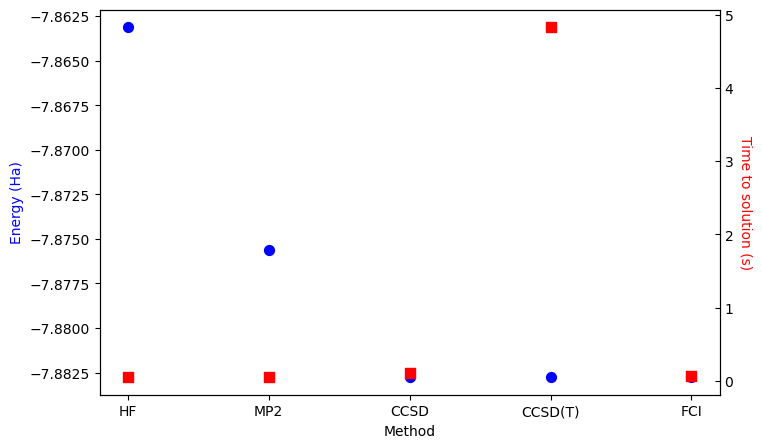

In [61]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

In [62]:
import plotly.express as px

# Create the figure
fig = px.scatter()

# Plot the energies
fig.add_scatter(x=methods, y=energies, mode="markers",\
                marker=dict(symbol="circle", size=10, color="blue"), name="Energy (a.u.)")

# Plot the time to solution
fig.add_scatter(x=methods, y= mf_times, mode="markers",\
                marker=dict(symbol="square", size=10, color="red"), name="Time to solution (s)", yaxis="y2")

# Set the x-axis labels and tick labels
fig.update_layout(xaxis=dict(tickmode="array", tickvals=methods, ticktext=methods, tickangle=90))

# Set the y-axis labels and colors
fig.update_layout(yaxis=dict(title="Energy(a.u.)", color="blue"),\
                  yaxis2=dict(title="Time to solution (s)", color="red", overlaying="y",\
                              side="right"))

# Show the graph
fig.show()

In [63]:
methods

['HF', 'MP2', 'CCSD', 'CCSD(T)', 'FCI']

In [64]:
# Plotting as jacob's Latter
fig = px.line(x=methods, y=energies, title="Jacob's Ladder", markers=True)
fig.update_layout(xaxis_title="Method", yaxis_title="Energy (a.u.)")
fig.update_traces(marker_size=12)
fig.show() # It's interactive!

De ce qui précède, il apparaît que, pour un même ensemble de bases chimiques de dimension moyenne, de taille $N$,
* en termes de **précision**, on a l’ordre suivant :

HF < MP2 < CCSD < CCSD(T) < FCI

* tn termes de **temps de calculs**, 

HF ($N^4$) < MP2 ($N^5$) < CCSD ($N^6$)  < CCSD(T) ($N^7$) < FCI ($N!$) 
On note sur ce graphique que l’augmentation de la complexité de l'ensemble de base rapproche la valeur propre de l’énergie de la véritable énergie de Hartree-Fock. Cette tendance peut également être généralisée à d'autres méthodes, comme [CCSD](https://en.wikipedia.org/wiki/Coupled_cluster), [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory), [FCI](https://en.wikipedia.org/wiki/Full_configuration_interaction), etc., bien que le temps de résolution serait plus long pour ces approches post Hartree-Fock. Ce qu’il faut retenir, c’est que même si une base infinie est nécessaire pour converger vers la véritable énergie, il y a des rendements décroissants à un moment donné, surtout si l’on considère le temps requis pour le calcul. Dans notre cas, `6-311G(d,p)` ou `6-311+G(d,p)` apparaît comme un bon choix en termes de précision et de temps de calcul.

![HF_Post_HF](./Graphics/HF_Post_HF.png)

### <a id='toc1_4_6_'></a>[Prise en compte de l'énergie de corrélation - Potentiel de l'informatique quantique](#toc0_)

Les méthodes Post Hatree-Fock sont destinées à prendre en compte l'énergie de corrélation électronique. L'énergie de corrélation est définie comme
$$
E_{\text{corr}} = E_{\text{FCI}} - E_{\text{HF}},
$$
dans lequel $E_{\text{FCI}}$ et $E_{\text{HF}}$ sont les énergies calculées à partir de la diagonalisation exacte de l'Hamiltonien moléculaire dans l'approximation de Born-Oppenheimer, c'est-à-dire l'interaction de configuration complète (FCI), et la méthode Hartree-Fock, respectivement. Puisqu'il est prohibitif sur le plan computationnel de résoudre le problème FCI, à l'exception de très petits systèmes, il est courant d'introduire des approximations pour inclure les effets de corrélation dans les calculs de structure électronique. Le problème FCI considère la diagonalisation de l'Hamiltonien dans une base de tous les déterminants excités possibles, c'est-à-dire tous les déterminants possibles à 1, 2, 3,…, N corps pour un système à N électrons. Par conséquent, la fonction d’onde FCI est une combinaison linéaire de tous les déterminants possibles pour un système à N électrons. Les méthodes approximatives n'incluent qu'un sous-ensemble des déterminants excités dans la fonction d'état approximative afin de capturer les effets de corrélation les plus importants (par exemple, théorie des perturbations à plusieurs corps, théorie des clusters couplés).

Cette énergie de corrélation peut être divisée en deux catégories : **corrélation statique** et **dynamique**. Pour considérer le premier cas, il faut utiliser des approches multi-configurations. Ces dernières peuvent être abordées avec des méthodes post Hartree-Fock avec un seul état de référence, comme Configuration Interaction (CI), Coupled-Cluster (CC) ou des méthodes perturbatives (MP2, MP3, .etc).